In [5]:
import os
import numpy as np
import pandas as pd

import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력

import seaborn as sns

# 그래프 설정 한글폰트
if os.name == 'nt': # 윈도우 사용자
    mpl.rc('font', family = 'Malgun Gothic')
elif os.name == 'posix': # 맥 사용자
    mpl.rc('font', family = 'AppleGothic')
else:
    print('check your os')
    
# 그래프의 한글을 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수값 나올 때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Ex. 4.1. 시각화 라이브러리를 호출하고 예제 데이터를 불러와 count plot의 시각화

path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/data'

df = pd.read_csv(f'{path}/store_market_data.csv')
df

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705566,2018-06-30,토,6,26,146297344,정상회원,수산,건어물,멸치류,국물멸치(300g),1.0,수지구,성복동,여,51.0,50대,9189,매장A,NaN,17:56
705567,2018-06-30,토,6,26,1532985472,정상회원,수산,해조,미역/다시마,자른다시마(100g),1.0,수지구,동천동,여,63.0,60대,5169,매장A,NaN,14:37
705568,2018-06-30,토,6,26,1532985472,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,수지구,동천동,여,63.0,60대,7466,매장A,NaN,14:37
705569,2018-06-30,토,6,26,1209779776,정상회원,간식,과자,스낵,하늘바다새우(60g),1.0,수지구,동천동,여,41.0,40대,3542,매장A,NaN,18:04


In [113]:
new_df = df['물품대분류'].value_counts()
new_df

채소       183235
축산물      125387
간식       111779
반찬        85960
수산        49853
양념/가루     33695
음료        31775
생활용품      25447
과실        19180
주곡        10290
잡곡        10228
서류        10002
건강         7142
주류         1029
기타          569
Name: 물품대분류, dtype: int64

<AxesSubplot:xlabel='물품대분류', ylabel='count'>

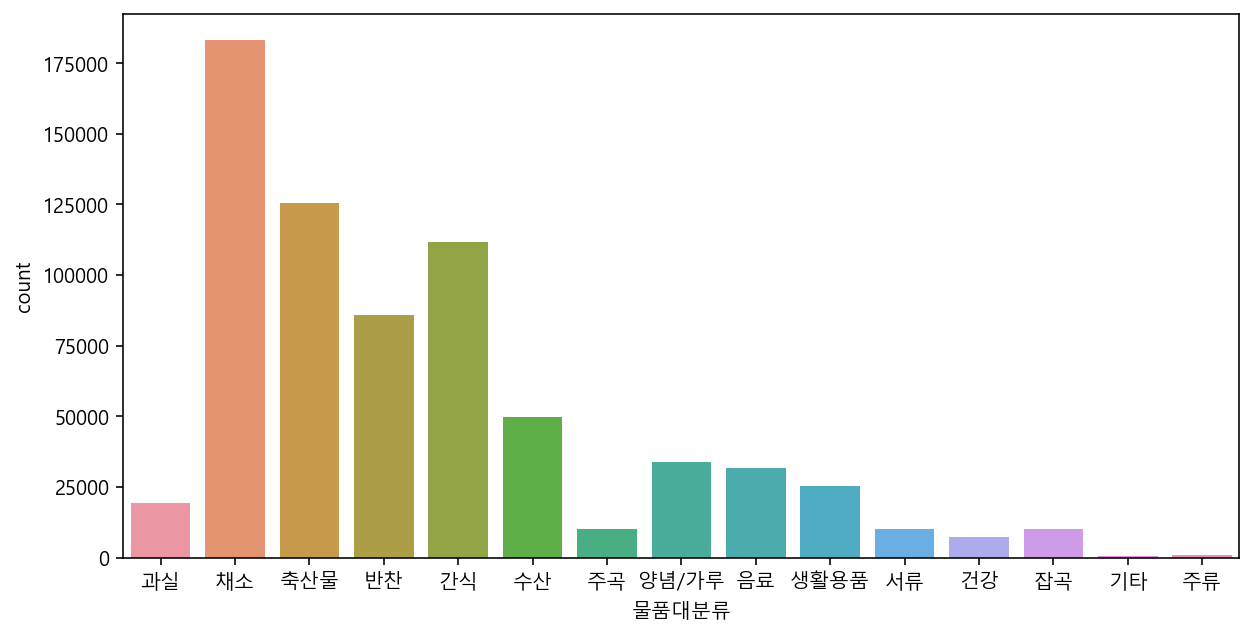

In [115]:
plt.figure(figsize=(10,5))
# new_df.plot.bar()
sns.countplot(data = df, x = '물품대분류')

<AxesSubplot:xlabel='연령대', ylabel='count'>

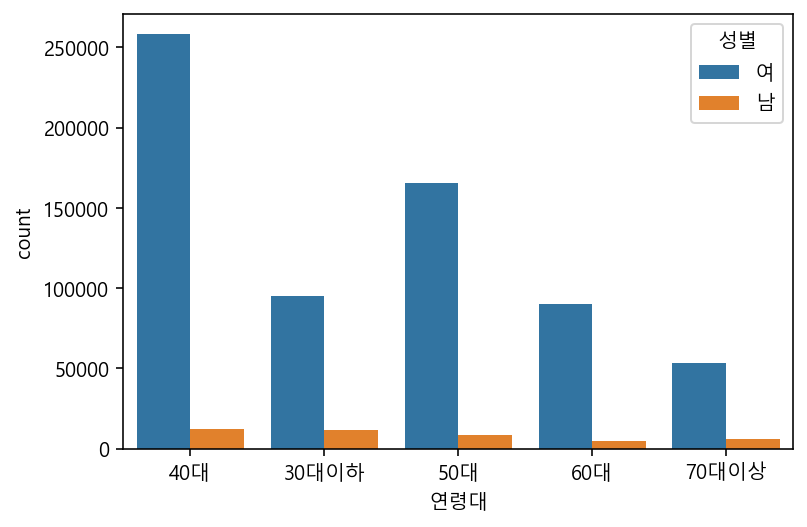

In [9]:
# Ex 4,2 예제 데이터의 연령대 항목에 대해 hue함수를 이용하여 '성별'을 오버레이한 count plot시각화하기

sns.countplot(data = df, x = '연령대', hue='성별')

<AxesSubplot:xlabel='공급주차', ylabel='구매금액'>

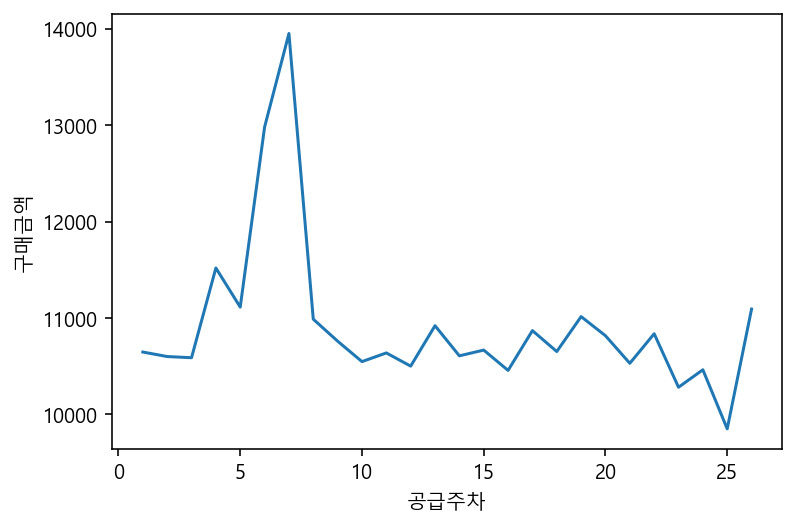

In [10]:
#Ex 4.3 예제 데이터의 공급주차에 대한 구매금액을 line plot 시각화 하기
sns.lineplot(data = df, x = '공급주차', y = '구매금액', ci = None)

<AxesSubplot:xlabel='성별', ylabel='연령'>

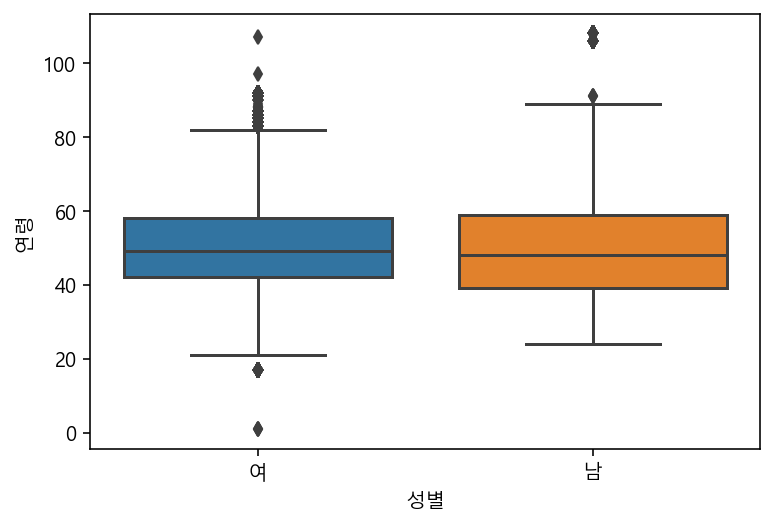

In [11]:
#Ex 4.4. 예제 데이터의 성별에 따른 연령을 box plot
sns.boxplot(data = df, x = '성별', y = '연령')

<AxesSubplot:xlabel='물품대분류', ylabel='구매금액'>

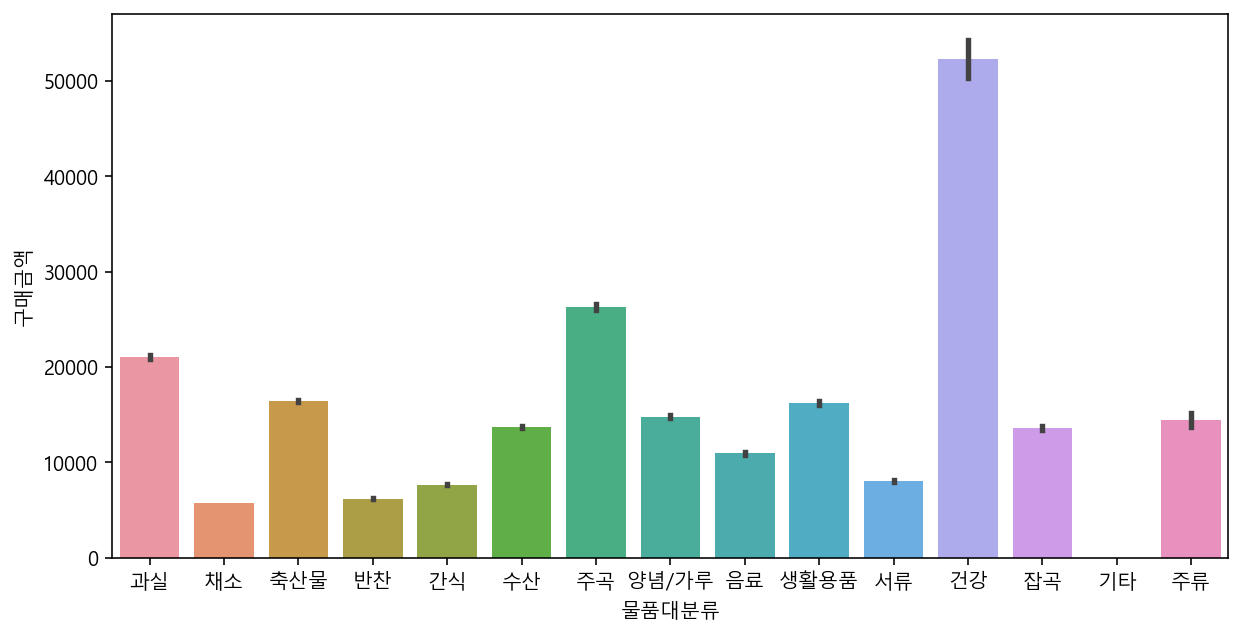

In [126]:
#Ex 4.5 예제 데이터의 물품 대분류별 구매 금액을 bar plot 하기
plt.figure(figsize = (10, 5))
sns.barplot(data = df, x = '물품대분류', y = '구매금액')

In [13]:
#Ex 4-6. 예제 데이터의 구매시각에서 시간 단위만 추출하여, 새로운 column을 만들고, 시간에 따른 구매의 합을 피벗테이블로 만들기
def func1(data) :
    return data[:2]

df['시간대'] = df['구매시각'].apply(func1)
new_df = df.pivot_table(index = '시간대', values = '구매금액', aggfunc = 'sum').reset_index()

<AxesSubplot:>

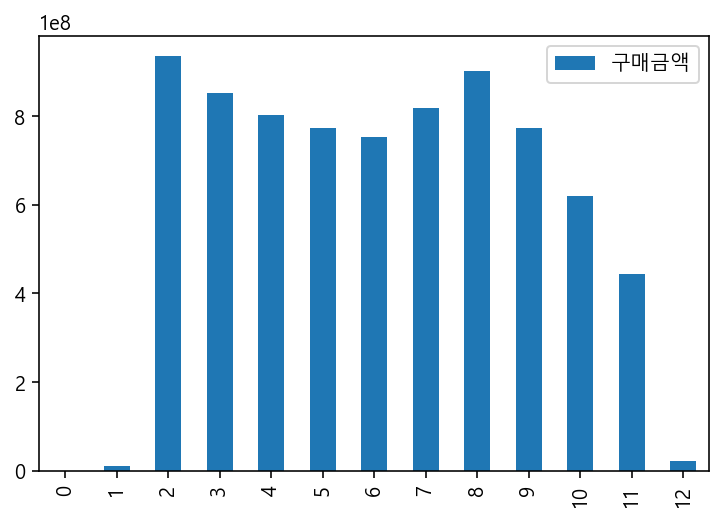

In [14]:
#Ex 4-7. 새로운 데이터프레임으로 선언하여 barplot 하기
new_df.plot.bar()

<AxesSubplot:xlabel='시간대', ylabel='구매금액'>

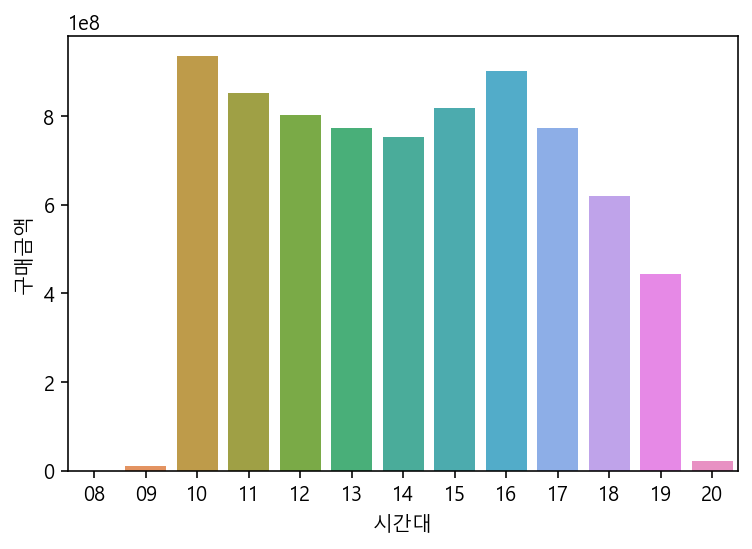

In [15]:
sns.barplot(data = new_df, x = '시간대', y = '구매금액')

<AxesSubplot:xlabel='구매금액', ylabel='Density'>

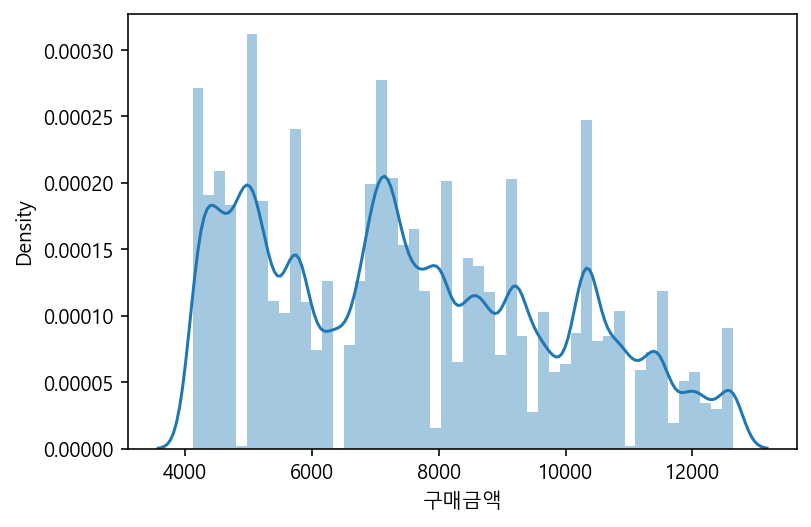

In [128]:
# Ex 4-8. 예제 데이터의 '구매금액'의 요약통계량을 확인하여 25~75사이 데이터만 추출하고, distplot 생성하기
df['구매금액'].describe()

new_df = df[(df['구매금액'] >= 4.116000e+03) & (df['구매금액'] <=  1.263500e+04)]

#sns.displot(data = new_df, x = '구매금액')  
sns.distplot(new_df['구매금액'])

In [30]:
#Ex 4.9 예제 데이터의 회원번호 와 공급일자를 이용하여 회원 번호 당 방문 횟수를 계산하고, 회원번호에 따른 방문 횟수와 구매금액을 하나의 data frame 생성하기

new_df = df.pivot_table(index = '회원번호', values = '공급일자', aggfunc = 'sum')
df['회원번호'].values

array([ 272369856, 1506656256, 1506656256, ..., 1532985472, 1209779776,
        301961920], dtype=int64)

In [102]:
arr1 = df.pivot_table(index = '회원번호', values = '공급일자', aggfunc='count')['공급일자']
arr2 = df.pivot_table(index= '회원번호', values='구매금액', aggfunc=sum)['구매금액']
dic = {'방문횟수':arr1, '구매금액':arr2}
arr3 = df['회원번호'].unique()
new_df = pd.DataFrame(data=dic, index=arr3)
new_df.sort_index(inplace=True)
new_df

,방문횟수,구매금액
18764160,33,604284
18792000,3,70642
18942336,68,1010616
19391488,1,3159
19627200,361,4101241
...,...,...
1607535424,1,13784
1607672768,3,121949
1670400000,3586,38171716
1670606016,12,225230


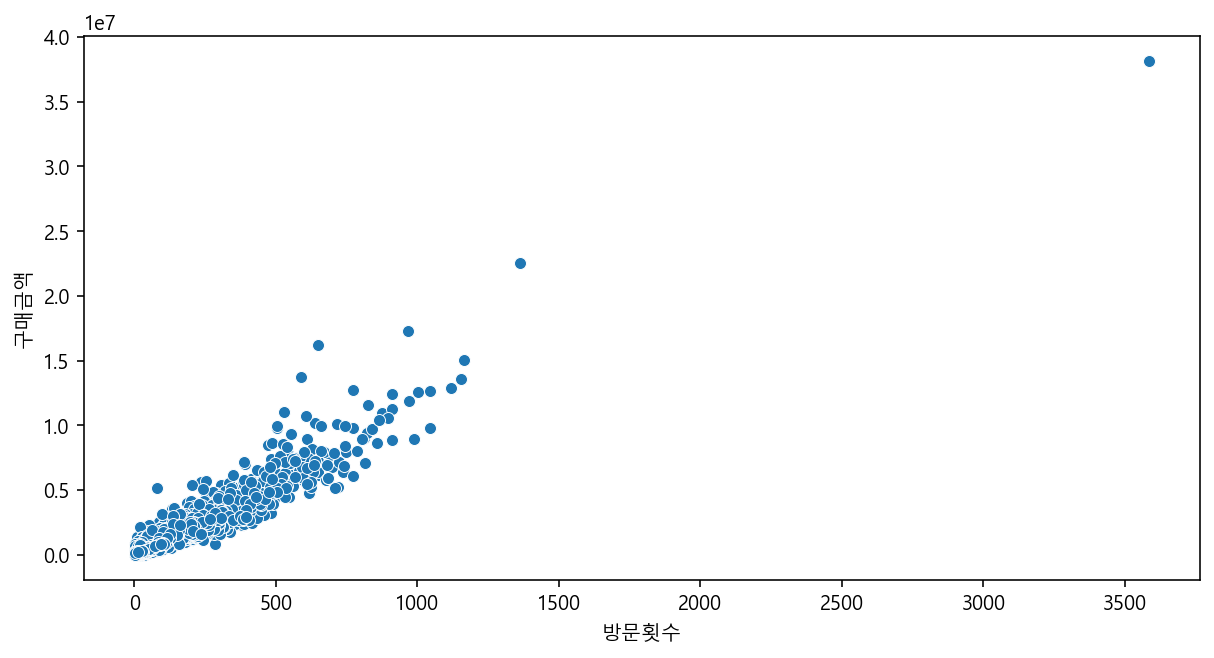

In [106]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=new_df['방문횟수'], y=new_df['구매금액'])
plt.show()

In [112]:
df[df['회원번호']==1670400000]

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,...,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각,시간대,방문횟수,방문회수
448,2018-01-02,화,1,1,1670400000,탈퇴,음료,음료,과즙,배즙(120ml/1봉-매장용),...,남,36.0,30대이하,4212,매장B,NaN,17:12,17,2.0,NaN
1155,2018-01-02,화,1,1,1670400000,탈퇴,축산물,유제품,요구르트,떠먹는 요거트(90g*2개),...,남,36.0,30대이하,7370,매장A,NaN,11:07,11,4.0,NaN
1156,2018-01-02,화,1,1,1670400000,탈퇴,축산물,유제품,요구르트,달지않은 떠먹는요거트(90g*2개),...,남,36.0,30대이하,7370,매장A,NaN,11:07,11,2.0,NaN
3034,2018-01-02,화,1,1,1670400000,탈퇴,축산물,유제품,우유/산양유,우유(범산/900ml),...,남,36.0,30대이하,10108,매장A,NaN,11:07,11,26.0,NaN
3590,2018-01-02,화,1,1,1670400000,탈퇴,양념/가루,장,된장,우리콩된장(900g),...,남,36.0,30대이하,40011,매장B,NaN,16:05,16,186.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703542,2018-06-30,토,6,26,1670400000,탈퇴,과실,과일,참다래,참다래(그린:2kg),...,남,36.0,30대이하,23930,매장D,NaN,10:56,10,NaN,NaN
704119,2018-06-30,토,6,26,1670400000,탈퇴,과실,과일,자두,자두/대석외/소(2kg),...,남,36.0,30대이하,12827,매장D,NaN,10:56,10,NaN,NaN
704310,2018-06-30,토,6,26,1670400000,탈퇴,채소,잎/줄기채소,브로컬리,브로컬리(250g),...,남,36.0,30대이하,3982,매장A,NaN,11:04,11,NaN,NaN
704525,2018-06-30,토,6,26,1670400000,탈퇴,반찬,두부/유부,두부,두부(1모:420g),...,남,36.0,30대이하,7466,매장C,NaN,18:10,18,NaN,NaN
